<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Model Building (optional, depending on your downstream task after PCA)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Metrics (optional, for evaluating models after PCA)
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, f1_score, confusion_matrix

In [5]:
#load data
df = pd.read_excel('/content/Online Retail.xlsx')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Handle missing values: Drop rows with missing values for simplicity
df_cleaned = df.dropna(subset=['Description'])

In [11]:
# Select relevant numerical features
features = df_cleaned[['Quantity', 'UnitPrice']]

In [12]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

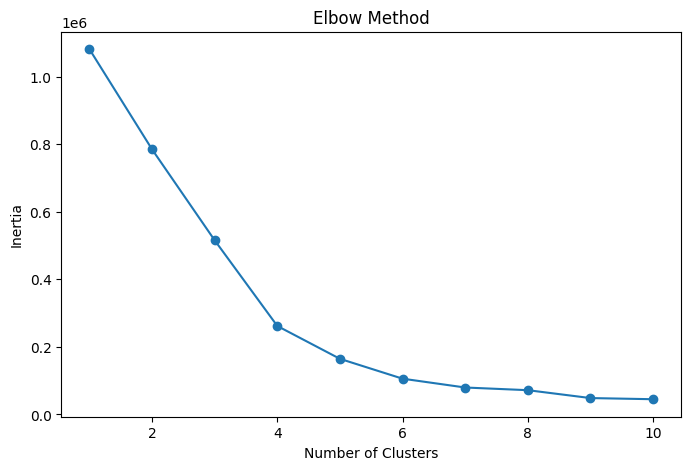

In [14]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Perform K-means clustering with an appropriate number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

<ipython-input-15-e056d08bf539>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)


In [16]:
# View the clustered data
print(df_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        0  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        0  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        0  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        0  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        0  


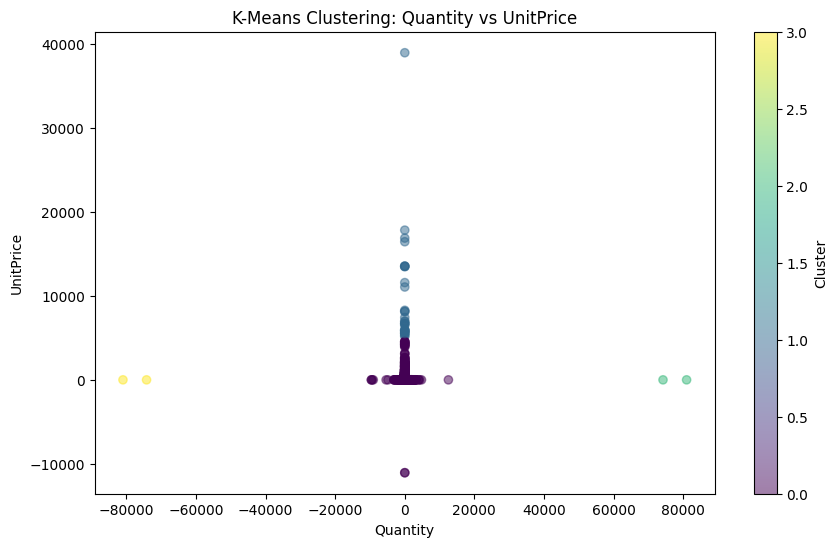

In [17]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'], c=df_cleaned['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering: Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.colorbar(label='Cluster')
plt.show()
